# `2.3 b) Scale sensitive models`

1. Numerical Scaling
1. (SMOTE) 'Synthetic Minority Over-sampling Technique' class balancing 
1. Modeling
    - a) Logistic Regression
    - b) (SVM) Support Vectore Machine
    - c) Neural Networks

## 2.3.0 Libraries and constants

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.3.1 Numerical Scaling
from sklearn.preprocessing import StandardScaler

# 2.3.2 SMOTE
from imblearn.over_sampling import SMOTE

# 2.3.3 Models
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model   import LogisticRegression
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
# Constants
TARGET_COLUMN = 'T1 - Is good credit'
RANDOM_STATE = 42

In [3]:
## Processed 10% Data
TRAIN_PROCESSED_10_PATH  = 'data/processed-data/2-fayaad-2-train_10_processed.csv'
TEST_PROCESSED_10_PATH   = 'data/processed-data/2-fayaad-2-test_10_processed.csv'

PROCESSED_TRAIN_10_DF = pd.read_csv(TRAIN_PROCESSED_10_PATH)
PROCESSED_TEST_10_DF  = pd.read_csv(TEST_PROCESSED_10_PATH)

Y_TRAIN_10, X_TRAIN_10 = PROCESSED_TRAIN_10_DF[TARGET_COLUMN], PROCESSED_TRAIN_10_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_10,  X_TEST_10  = PROCESSED_TEST_10_DF[TARGET_COLUMN],  PROCESSED_TEST_10_DF.drop(columns=[TARGET_COLUMN])

In [4]:
## Processed 30% Data
TRAIN_PROCESSED_30_PATH  = 'data/processed-data/2-fayaad-2-train_30_processed.csv'
TEST_PROCESSED_30_PATH   = 'data/processed-data/2-fayaad-2-test_30_processed.csv'

PROCESSED_TRAIN_30_DF = pd.read_csv(TRAIN_PROCESSED_30_PATH)
PROCESSED_TEST_30_DF  = pd.read_csv(TEST_PROCESSED_30_PATH)

Y_TRAIN_30, X_TRAIN_30 = PROCESSED_TRAIN_30_DF[TARGET_COLUMN], PROCESSED_TRAIN_30_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_30,  X_TEST_30  = PROCESSED_TEST_30_DF[TARGET_COLUMN],  PROCESSED_TEST_30_DF.drop(columns=[TARGET_COLUMN])

In [5]:
## Raw 30% Data
TRAIN_RAW_30_PATH  = 'data/processed-data/2-fayaad-2-train_30_raw.csv'
TEST_RAW_30_PATH   = 'data/processed-data/2-fayaad-2-test_30_raw.csv'

RAW_TRAIN_30_DF = pd.read_csv(TRAIN_RAW_30_PATH)
RAW_TEST_30_DF  = pd.read_csv(TEST_RAW_30_PATH)

Y_TRAIN_RAW_30, X_TRAIN_RAW_30 = RAW_TRAIN_30_DF[TARGET_COLUMN], RAW_TRAIN_30_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_RAW_30,  X_TEST_RAW_30 = RAW_TEST_30_DF[TARGET_COLUMN],  RAW_TEST_30_DF.drop(columns=[TARGET_COLUMN])

## 2.3.1 Numerical Scaling

In [6]:
# Instantiate the scaler
scaler = StandardScaler()

In [7]:
## Scale 10% Data
scaler.fit(X_TRAIN_10)

# Transform both the training and testing data
X_TRAIN_10_SCALED = pd.DataFrame(scaler.transform(X_TRAIN_10), columns=X_TRAIN_10.columns)
X_TEST_10_SCALED  = pd.DataFrame(scaler.transform(X_TEST_10),  columns=X_TEST_10.columns)

In [8]:
## Scale 30% Data
scaler.fit(X_TRAIN_30)

# Transform both the training and testing data
X_TRAIN_30_SCALED = pd.DataFrame(scaler.transform(X_TRAIN_30), columns=X_TRAIN_30.columns)
X_TEST_30_SCALED  = pd.DataFrame(scaler.transform(X_TEST_30),  columns=X_TEST_30.columns)

In [9]:
## Scale Raw 30% Data
scaler.fit(X_TRAIN_RAW_30)

# Transform both the training and testing data
X_TRAIN_RAW_30_SCALED = scaler.transform(X_TRAIN_RAW_30)
X_TEST_RAW_30_SCALED  = scaler.transform(X_TEST_RAW_30)

## 2.3.2 Class balancing

In [10]:
# Instantiate SMOTE
smoter = SMOTE(random_state = RANDOM_STATE)

In [11]:
## SMOTE on 10% Data
X_TRAIN_10_RESAMPLED, Y_TRAIN_10_RESAMPLED = smoter.fit_resample(X_TRAIN_10_SCALED, Y_TRAIN_10)

In [12]:
## SMOTE on 30% Data
X_TRAIN_30_RESAMPLED, Y_TRAIN_30_RESAMPLED = smoter.fit_resample(X_TRAIN_30_SCALED, Y_TRAIN_30)

In [13]:
## SMOTE on Raw 30% Data
X_TRAIN_RAW_30_RESAMPLED, Y_TRAIN_RAW_30_RESAMPLED = smoter.fit_resample(X_TRAIN_RAW_30_SCALED, Y_TRAIN_RAW_30)

## 2.3.3 Modeling

![Confusion matrix and metrics](https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281414573567@1746013536337/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.tif)

In [14]:
def fit_predict_metrics(model, smote: bool, X_train, y_train, X_test, y_test):
    
    print(
        f"""\n--- {model.__class__.__name__} Results ---
        SMOTE applied: {smote}""")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

In [15]:
# Instantiate models
log_reg        = LogisticRegression(random_state=RANDOM_STATE)
svm_svc_model  = SVC(random_state=RANDOM_STATE)
nn_mlpc_model  = MLPClassifier(random_state=RANDOM_STATE, max_iter=1000)

### a) Logistic regression


--- LogisticRegression Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.40      0.63      0.49        30
           1       0.79      0.60      0.68        70

    accuracy                           0.61       100
   macro avg       0.60      0.62      0.59       100
weighted avg       0.68      0.61      0.63       100


--- LogisticRegression Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        30
           1       0.77      0.81      0.79        70

    accuracy                           0.70       100
   macro avg       0.64      0.62      0.63       100
weighted avg       0.69      0.70      0.69       100



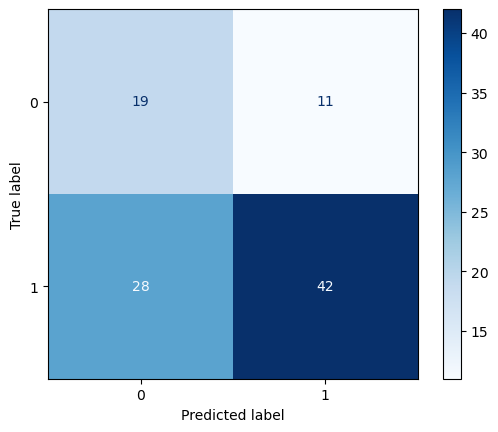

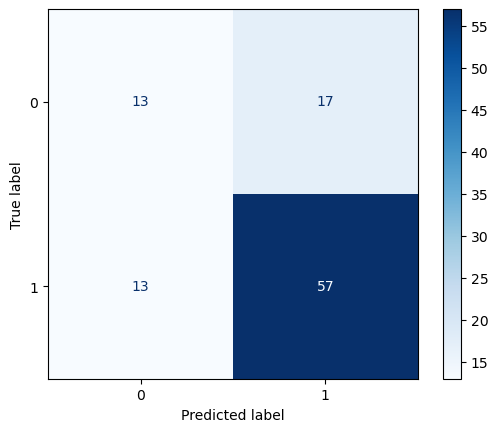

In [16]:
# LR 10% Data
fit_predict_metrics(log_reg, smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)
fit_predict_metrics(log_reg, smote=False, X_train=X_TRAIN_10_SCALED,    y_train=Y_TRAIN_10,           X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)


--- LogisticRegression Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.41      0.59      0.48        90
           1       0.78      0.63      0.70       210

    accuracy                           0.62       300
   macro avg       0.60      0.61      0.59       300
weighted avg       0.67      0.62      0.63       300


--- LogisticRegression Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        90
           1       0.77      0.86      0.81       210

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.71      0.72      0.71       300



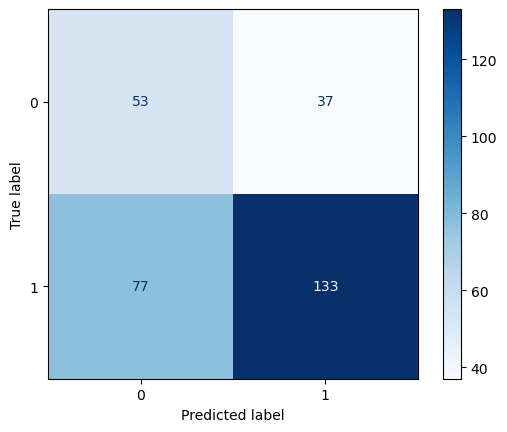

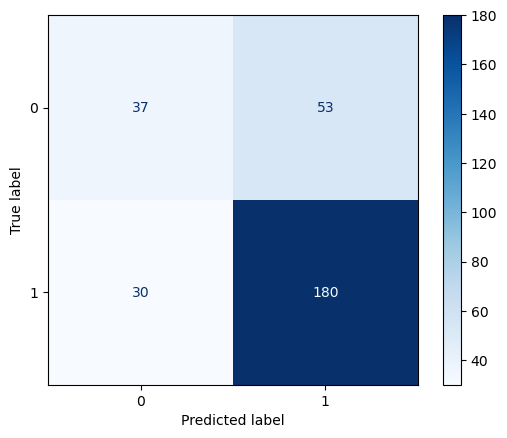

In [17]:
# LR 30% Data
fit_predict_metrics(log_reg, smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)
fit_predict_metrics(log_reg, smote=False, X_train=X_TRAIN_30_SCALED,    y_train=Y_TRAIN_30,           X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)


--- LogisticRegression Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

       False       0.50      0.66      0.57        90
        True       0.83      0.72      0.77       210

    accuracy                           0.70       300
   macro avg       0.66      0.69      0.67       300
weighted avg       0.73      0.70      0.71       300


--- LogisticRegression Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

       False       0.58      0.49      0.53        90
        True       0.79      0.85      0.82       210

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300



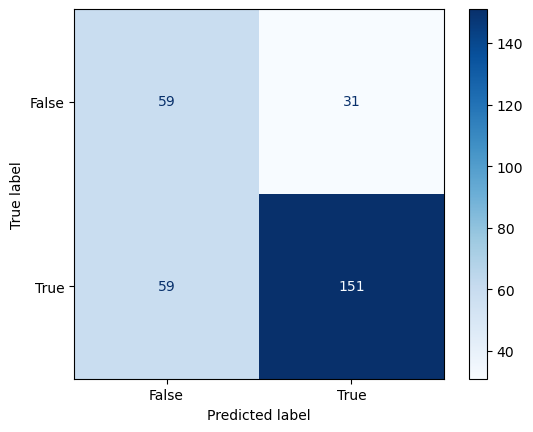

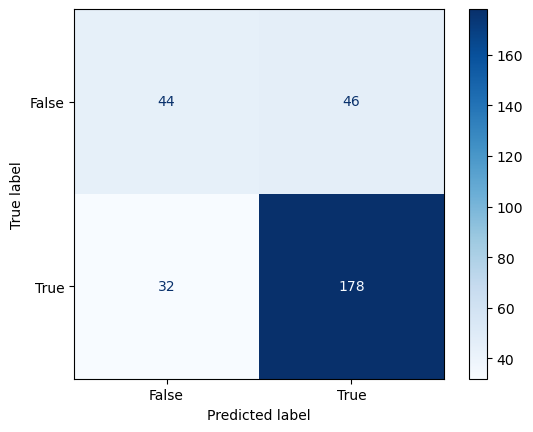

In [18]:
# LR Raw 30% Data
fit_predict_metrics(log_reg, smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)
fit_predict_metrics(log_reg, smote=False, X_train=X_TRAIN_RAW_30_SCALED,    y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)

### b) (SVM-C) Support Vector Machine Classifier


--- SVC Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        30
           1       0.77      0.73      0.75        70

    accuracy                           0.66       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.67      0.66      0.67       100


--- SVC Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        30
           1       0.72      0.90      0.80        70

    accuracy                           0.68       100
   macro avg       0.57      0.53      0.52       100
weighted avg       0.63      0.68      0.63       100



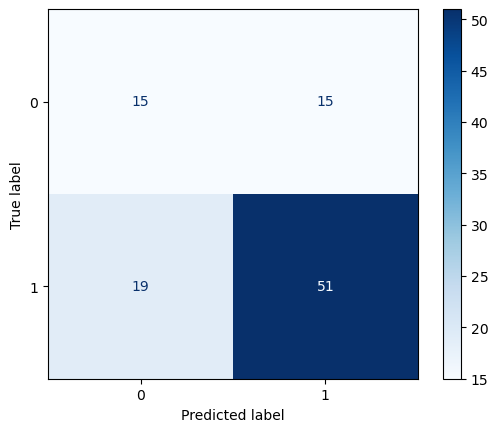

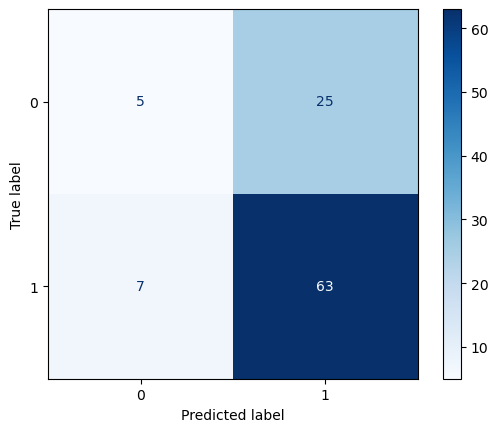

In [19]:
# SVC 10% Data
fit_predict_metrics(svm_svc_model, smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)
fit_predict_metrics(svm_svc_model, smote=False, X_train=X_TRAIN_10_SCALED,    y_train=Y_TRAIN_10,           X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)


--- SVC Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        90
           1       0.76      0.72      0.74       210

    accuracy                           0.65       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.66      0.65      0.65       300


--- SVC Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.42      0.18      0.25        90
           1       0.72      0.90      0.80       210

    accuracy                           0.68       300
   macro avg       0.57      0.54      0.52       300
weighted avg       0.63      0.68      0.63       300



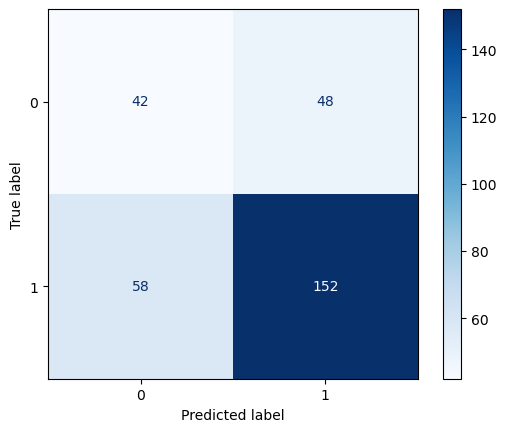

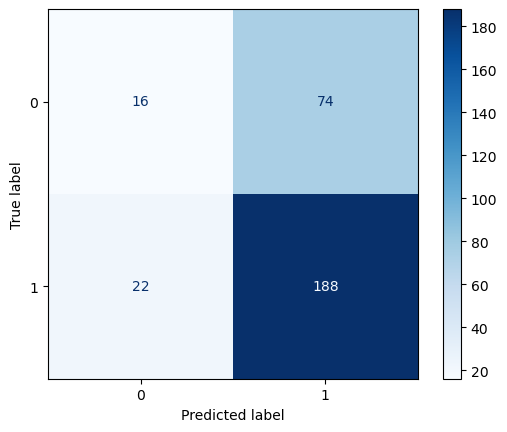

In [20]:
# SVC 30% Data
fit_predict_metrics(svm_svc_model, smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)
fit_predict_metrics(svm_svc_model, smote=False, X_train=X_TRAIN_30_SCALED,    y_train=Y_TRAIN_30,           X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)


--- SVC Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

       False       0.58      0.51      0.54        90
        True       0.80      0.84      0.82       210

    accuracy                           0.74       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.74      0.74      0.74       300


--- SVC Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

       False       0.69      0.34      0.46        90
        True       0.77      0.93      0.84       210

    accuracy                           0.76       300
   macro avg       0.73      0.64      0.65       300
weighted avg       0.74      0.76      0.73       300



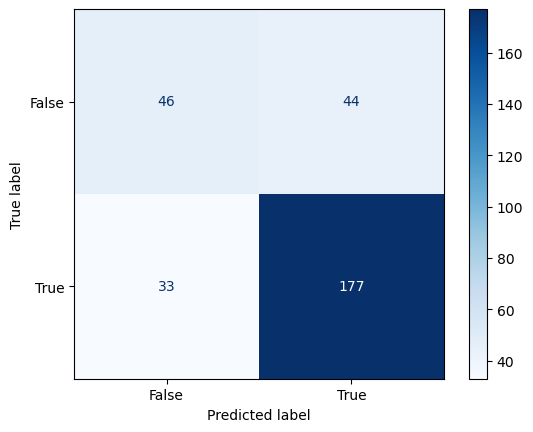

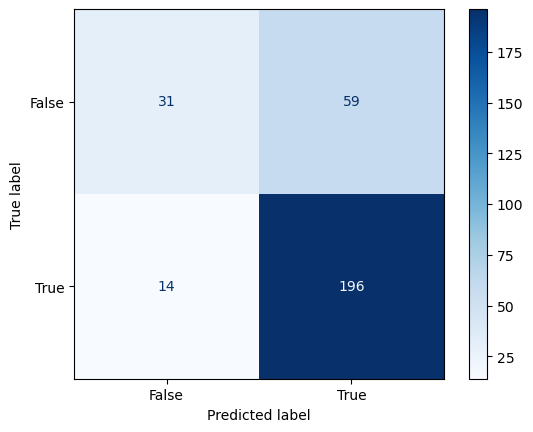

In [21]:
# SVC Raw 30% Data
fit_predict_metrics(svm_svc_model, smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)
fit_predict_metrics(svm_svc_model, smote=False, X_train=X_TRAIN_RAW_30_SCALED,    y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)

### c) Neural Networks


--- MLPClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.41      0.53      0.46        30
           1       0.77      0.67      0.72        70

    accuracy                           0.63       100
   macro avg       0.59      0.60      0.59       100
weighted avg       0.66      0.63      0.64       100


--- MLPClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        30
           1       0.77      0.73      0.75        70

    accuracy                           0.66       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.67      0.66      0.67       100



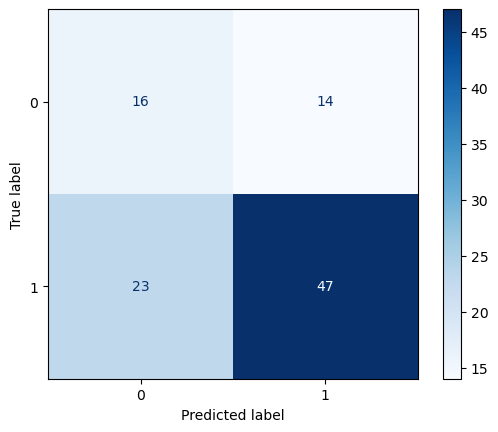

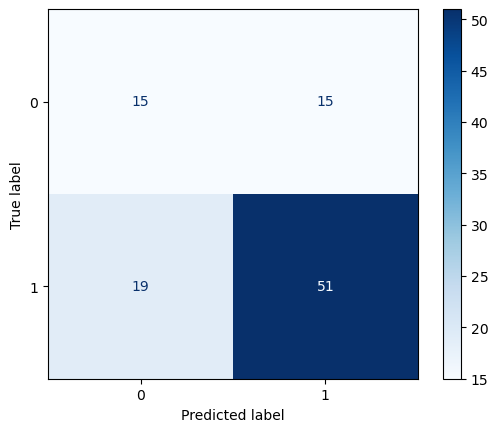

In [22]:
# MLP-C 10% Data
fit_predict_metrics(nn_mlpc_model, smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)
fit_predict_metrics(nn_mlpc_model, smote=False, X_train=X_TRAIN_10_SCALED,    y_train=Y_TRAIN_10,           X_test=X_TEST_10_SCALED, y_test=Y_TEST_10)


--- MLPClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.45      0.48      0.46        90
           1       0.77      0.75      0.76       210

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.67      0.67       300


--- MLPClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        90
           1       0.76      0.76      0.76       210

    accuracy                           0.66       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.66      0.66       300



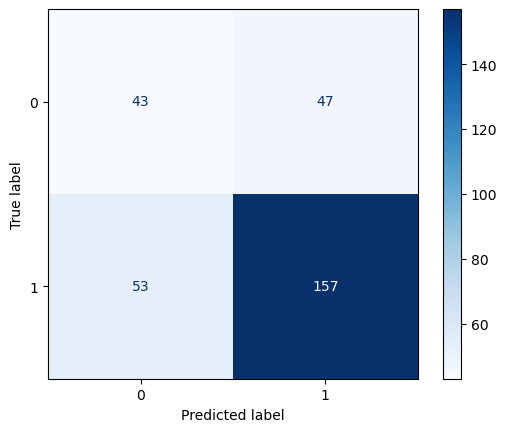

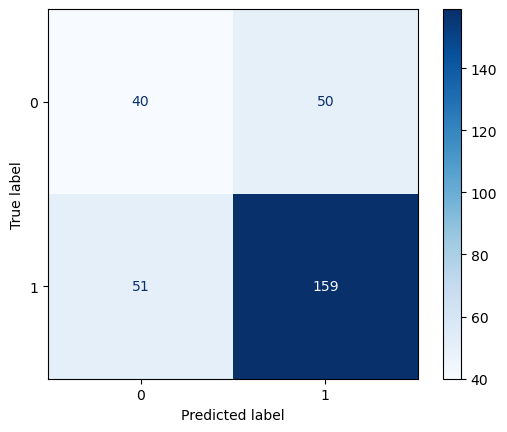

In [23]:
# MLP-C 30% Data
fit_predict_metrics(nn_mlpc_model, smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)
fit_predict_metrics(nn_mlpc_model, smote=False, X_train=X_TRAIN_30_SCALED,    y_train=Y_TRAIN_30,           X_test=X_TEST_30_SCALED, y_test=Y_TEST_30)


--- MLPClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

       False       0.52      0.48      0.50        90
        True       0.78      0.81      0.80       210

    accuracy                           0.71       300
   macro avg       0.65      0.64      0.65       300
weighted avg       0.70      0.71      0.71       300


--- MLPClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

       False       0.51      0.42      0.46        90
        True       0.77      0.83      0.80       210

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.69      0.71      0.70       300



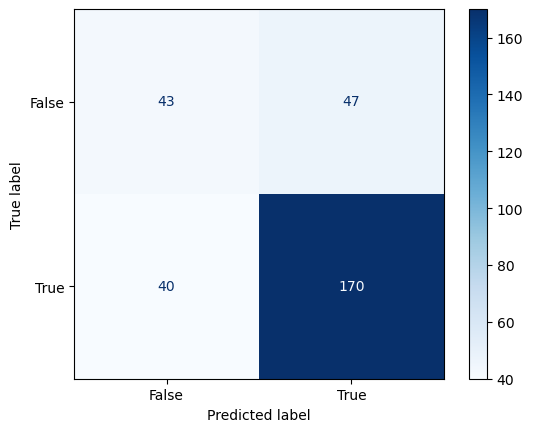

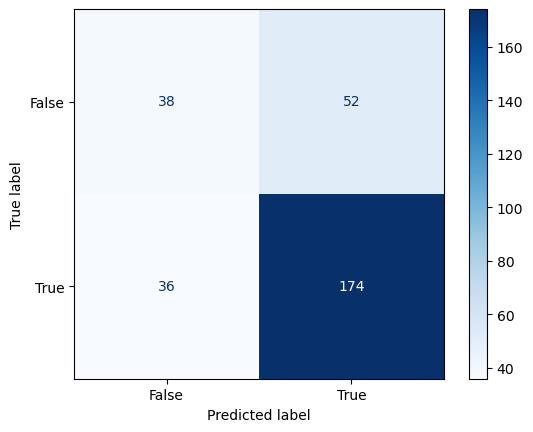

In [24]:
# MLP-C Raw 30% Data
fit_predict_metrics(nn_mlpc_model, smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)
fit_predict_metrics(nn_mlpc_model, smote=False, X_train=X_TRAIN_RAW_30_SCALED,    y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30_SCALED, y_test=Y_TEST_RAW_30)

# END